In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv('/content/airlines_flights_data.csv')

In [44]:
df.head(2)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [45]:
df.dtypes

,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [46]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

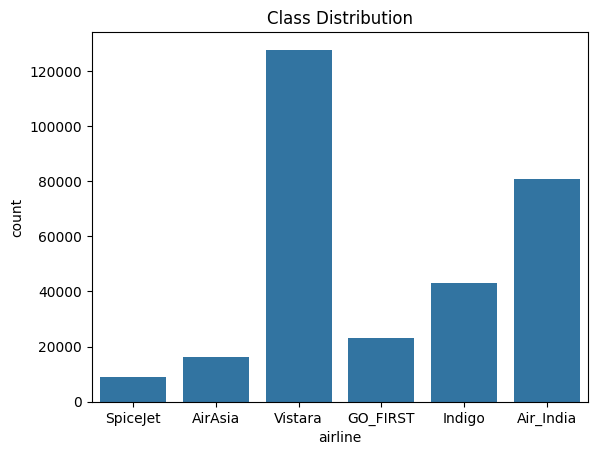

In [48]:
sns.countplot(x='airline',data=df)
plt.title('Class Distribution')
plt.show()

In [49]:
percentages = df['airline'].value_counts(normalize=True)*100
print(percentages)

airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64


In [50]:
# pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

lb=LabelEncoder()
df['airline'] = lb.fit_transform(df[['airline']])
df['flight'] = lb.fit_transform(df[['flight']])
df['source_city'] = lb.fit_transform(df[['source_city']])
df['departure_time'] = lb.fit_transform(df[['departure_time']])
df['stops'] = lb.fit_transform(df[['stops']])
df['arrival_time'] = lb.fit_transform(df[['arrival_time']])
df['destination_city'] = lb.fit_transform(df[['destination_city']])
df['class'] = lb.fit_transform(df[['class']])

X=df.drop(columns = ['airline'])
y=df['airline']

# Split into train-test (always apply SMOTE on training data only)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [52]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({5: 95894, 1: 60669, 3: 32340, 2: 17380, 0: 12073, 4: 6758})
After SMOTE: Counter({0: 95894, 3: 95894, 1: 95894, 5: 95894, 2: 95894, 4: 95894})


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on original test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4025
           1       1.00      1.00      1.00     20223
           2       1.00      1.00      1.00      5793
           3       1.00      1.00      1.00     10780
           4       1.00      1.00      1.00      2253
           5       1.00      1.00      1.00     31965

    accuracy                           1.00     75039
   macro avg       1.00      1.00      1.00     75039
weighted avg       1.00      1.00      1.00     75039

